In [1]:
import cell2cell as c2c

import numpy as np
import pandas as pd

import scipy

from cci_distance_correlation import get_correlation
from ga_results import load_ga_results, organize_ga_results, plot_run_results

import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted, venn3_unweighted
%matplotlib inline

In [2]:
import os

output_folder = '../results/Comparison-CCI-scores/'
if not os.path.isdir(output_folder):
    os.mkdir(output_folder)

In [3]:
files = dict()
files['output_folder'] = output_folder

# Load Data

In [4]:
ga1 = load_ga_results('../data/GA-Bray-Curtis/')

../data/GA-Bray-Curtis/00b38259-fcc5-4b80-ace5-dbdfd1ac182d.json
../data/GA-Bray-Curtis/015bcbfb-254f-4d44-9f0c-a4cd42e3590a.json
../data/GA-Bray-Curtis/01f22080-3be6-4008-b872-94fff7e6c8be.json
../data/GA-Bray-Curtis/05dcee41-23eb-4479-9352-c2384919d030.json
../data/GA-Bray-Curtis/07fd442e-7fe6-4d4c-b93d-cd9b4c5c0ff9.json
../data/GA-Bray-Curtis/09e155e0-fdb3-4454-9fd2-c6e6beca8f17.json
../data/GA-Bray-Curtis/0c3cac41-6dc9-40b8-8d86-2d0b8eb251ef.json
../data/GA-Bray-Curtis/1565a6c3-ec25-48c3-a876-0e125a8135f8.json
../data/GA-Bray-Curtis/16454cb9-63ff-4f87-bead-d00da5c3d494.json
../data/GA-Bray-Curtis/16853cac-daa6-4d5a-a4c2-2f4f52c8e446.json
../data/GA-Bray-Curtis/1c6adf2c-294e-4a7b-8d9d-e21e6b480104.json
../data/GA-Bray-Curtis/1c882920-35fa-4340-8b58-37c0c26c52dc.json
../data/GA-Bray-Curtis/1d303674-1c7f-4cce-b298-a368bcd57b60.json
../data/GA-Bray-Curtis/1ef12ff3-04d8-4c8b-a9c8-f74eabd6b845.json
../data/GA-Bray-Curtis/2567b51a-1ff0-4b88-94cc-ab7ae2142ff2.json
../data/GA-Bray-Curtis/25

In [5]:
ga2 = load_ga_results('../data/GA-LR-Count/')

../data/GA-LR-Count/0054565f-fa7c-4517-ae47-41f66391fd98.json
../data/GA-LR-Count/040b576c-0e38-4d7d-8b05-5a4db7bbd5a3.json
../data/GA-LR-Count/0493687c-9b0b-41dc-82ff-902f33a8534a.json
../data/GA-LR-Count/0506a8e2-78a8-41b3-aef7-9415707ab8f0.json
../data/GA-LR-Count/05dc8647-1387-491a-abad-af9495371c4c.json
../data/GA-LR-Count/06ffa4cc-04ff-4548-86fc-7e1d32e5ef0d.json
../data/GA-LR-Count/08d29508-9e23-4a5b-9f08-9697df7262c0.json
../data/GA-LR-Count/0d9c927d-6670-40a9-a998-6a528203b205.json
../data/GA-LR-Count/0da4272a-8cf1-4bc0-b8d0-e441242ce9d0.json
../data/GA-LR-Count/1048a6ac-b437-4268-a9c5-22b41afd87c1.json
../data/GA-LR-Count/12552e43-79f3-4e86-8a35-e98a1452200f.json
../data/GA-LR-Count/14e6abea-4314-4076-a081-95424898cc8c.json
../data/GA-LR-Count/16752b51-09b2-4aca-9dd5-f17b1fd802bf.json
../data/GA-LR-Count/196a4924-fa6a-49a6-84d2-5f44bb85e024.json
../data/GA-LR-Count/1ad72989-c229-4e93-8678-a9dcd7fd0d09.json
../data/GA-LR-Count/1d01f168-b559-4aee-b919-a1097caea34f.json
../data/

In [6]:
ga3 = load_ga_results('../data/GA-ICELLNET/')

../data/GA-ICELLNET/0141aa97-893c-4d25-9d69-5a1cde3c36b6.json
../data/GA-ICELLNET/043c0c44-cb36-4933-aa45-9ba70e004137.json
../data/GA-ICELLNET/04eeaf98-7f8d-4b90-afcc-a4f9f2294777.json
../data/GA-ICELLNET/07ec168f-f388-4b7e-a49a-604786ee3f3c.json
../data/GA-ICELLNET/09b258c9-fdfc-494e-b9e5-64db43d0fe1b.json
../data/GA-ICELLNET/0cfdcee9-0f8e-4358-9c3a-0a796ed09399.json
../data/GA-ICELLNET/0e6b3adc-9f2b-4dcd-a22e-6674784b5c72.json
../data/GA-ICELLNET/0ede2cc0-45d3-4766-8a45-7d54a3e59f71.json
../data/GA-ICELLNET/100ca935-c1eb-4b07-a726-84a0c19291d4.json
../data/GA-ICELLNET/125c57d5-52e8-47e9-aea0-b5b2682cc551.json
../data/GA-ICELLNET/189658b0-cf4d-4192-ad93-99c4ca5d551c.json
../data/GA-ICELLNET/1a21bc2b-5e9c-4c4b-b482-01cef524b8e2.json
../data/GA-ICELLNET/1b3a7d48-b2b6-4da1-bbd3-cf2658b7129a.json
../data/GA-ICELLNET/1b60b00f-fe09-4777-95be-70f4d42281a2.json
../data/GA-ICELLNET/1c428010-feb4-499d-8fce-4ec6e5dea6cb.json
../data/GA-ICELLNET/1f6be7f3-70ae-4f47-b4fa-409f79b3ebfe.json
../data/

In [7]:
lr_ga1 = pd.read_csv('../data/PPI-Networks/Celegans-GA-BrayCurtis-Selected-LR-pairs.csv')

In [8]:
lr_ga2 = pd.read_csv('../data/PPI-Networks/Celegans-GA-LRCount-Selected-LR-pairs.csv')

In [9]:
lr_ga3 = pd.read_csv('../data/PPI-Networks/Celegans-GA-ICELLNET-Selected-LR-pairs.csv')

In [10]:
lr_init = pd.read_excel('../data/PPI-Networks/Celegans-Curated-LR-pairs.xlsx')

# Analysis

**Structure data for visualization**

In [11]:
df_ga1 = organize_ga_results(ga1, initial_corr=0.2068)
df_ga2 = organize_ga_results(ga2, initial_corr=0.2501)
df_ga3 = organize_ga_results(ga3, initial_corr=0.3046)

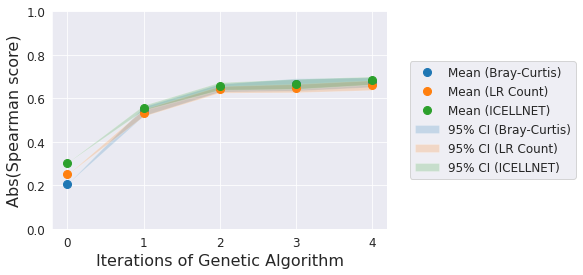

In [12]:
plot_run_results([df_ga1, df_ga2, df_ga3], ['Bray-Curtis', 'LR Count', 'ICELLNET'])
plt.savefig(files['output_folder'] + 'Comparison-CCI-scores-GA-runs.pdf',
            dpi=300,
            bbox_inches='tight')

**Compare distributions of optimal correlations from all GA runs**

In [13]:
scipy.stats.mannwhitneyu(ga1[2], ga2[2])

MannwhitneyuResult(statistic=8339.0, pvalue=3.427277273614565e-16)

In [14]:
scipy.stats.mannwhitneyu(ga1[2], ga3[2])

MannwhitneyuResult(statistic=4624.0, pvalue=0.358884607038336)

In [15]:
scipy.stats.mannwhitneyu(ga2[2], ga3[2])

MannwhitneyuResult(statistic=1022.0, pvalue=2.5126263129703426e-22)

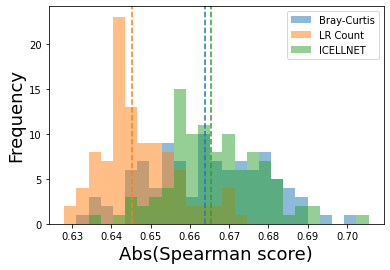

In [16]:
bins = np.histogram(np.hstack((ga1[2], ga2[2], ga3[2])), bins=25)[1]

_ = plt.hist(ga1[2], bins=bins, alpha=0.5, label='Bray-Curtis')
_ = plt.hist(ga2[2], bins=bins, alpha=0.5, label='LR Count')
_ = plt.hist(ga3[2], bins=bins, alpha=0.5, label='ICELLNET')

plt.axvline(x=np.nanmedian(ga1[2]), c='C0', ls='--')
plt.axvline(x=np.nanmedian(ga2[2]), c='C1',ls='--')
plt.axvline(x=np.nanmedian(ga3[2]), c='C2',ls='--')

plt.legend()
plt.xlabel('Abs(Spearman score)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

plt.savefig(files['output_folder'] + 'Comparison-CCI-scores-Opt-Dist.pdf',
            dpi=300,
            bbox_inches='tight')

In [17]:
np.nanmedian(ga1[2]), np.nanmedian(ga2[2]) , np.nanmedian(ga3[2]) 

(0.6639484646662313, 0.6451763535609416, 0.6652914607428215)

## Bray-Curtis / LR Count / ICELLNET

**Compare CORE LR pairs**

In [18]:
ligands1 = lr_ga1['Ligand_symbol'].unique().tolist()
ligands2 = lr_ga2['Ligand_symbol'].unique().tolist()
ligands3 = lr_ga3['Ligand_symbol'].unique().tolist()

In [19]:
receptors1 = lr_ga1['Receptor_symbol'].unique().tolist()
receptors2 = lr_ga2['Receptor_symbol'].unique().tolist()
receptors3 = lr_ga3['Receptor_symbol'].unique().tolist()

In [20]:
lr1 = lr_ga1.apply(lambda row: row['Ligand_symbol'] + ' / ' + row['Receptor_symbol'], axis=1).values.tolist()
lr2 = lr_ga2.apply(lambda row: row['Ligand_symbol'] + ' / ' + row['Receptor_symbol'], axis=1).values.tolist()
lr3 = lr_ga3.apply(lambda row: row['Ligand_symbol'] + ' / ' + row['Receptor_symbol'], axis=1).values.tolist()

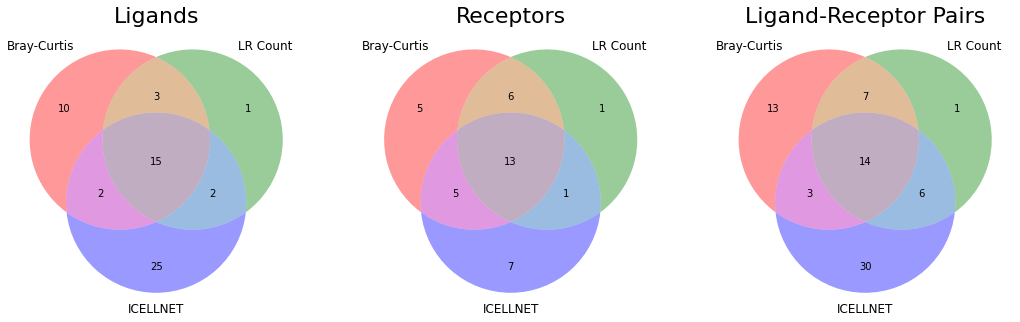

In [21]:
fig, axn = plt.subplots(1, 3, figsize=(18, 6))

pairs = [(ligands1, ligands2, ligands3), (receptors1, receptors2, receptors3), (lr1, lr2, lr3)]
titles = ['Ligands', 'Receptors', 'Ligand-Receptor Pairs']

for ax, pair, t in zip(axn.flatten(), pairs, titles):
    p1, p2, p3 = pair[0], pair[1], pair[2]
    vd = venn3_unweighted([set(p1), set(p2), set(p3)], ('Bray-Curtis', 'LR Count', 'ICELLNET'), alpha=0.4, ax=ax)
    ax.set_title(t, size=22)
plt.savefig(files['output_folder'] + 'Comparison-CCI-scores-Core2-LRs.pdf',
            dpi=300,
            bbox_inches='tight')

In [22]:
sorted(set(lr1) & set(lr2) & set(lr3))

['K05F1.5 / dma-1',
 'col-99 / ddr-1',
 'cwn-1 / mig-1',
 'grd-11 / ptc-1',
 'let-2 / pat-3',
 'let-756 / ver-1',
 'lin-44 / cfz-2',
 'mab-20 / plx-2',
 'mec-5 / mec-10',
 'mnr-1 / dma-1',
 'mom-2 / lin-18',
 'qua-1 / ptc-3',
 'smp-2 / plx-2',
 'wrt-5 / ptc-1']

In [23]:
set(ligands1) & set(ligands2) & set(ligands3)

{'K05F1.5',
 'col-99',
 'cwn-1',
 'grd-11',
 'let-2',
 'let-756',
 'lin-44',
 'mab-20',
 'mec-5',
 'mnr-1',
 'mom-2',
 'qua-1',
 'smp-1',
 'smp-2',
 'wrt-5'}

In [27]:
set(receptors1) & set(receptors2) & set(receptors3)

{'cfz-2',
 'ddr-1',
 'dma-1',
 'glp-1',
 'lin-17',
 'lin-18',
 'mec-10',
 'mig-1',
 'pat-3',
 'plx-2',
 'ptc-1',
 'ptc-3',
 'ver-1'}